In [286]:
import sys
%load_ext autoreload
%autoreload 2

path = '/home/nol/atom_pjs/ai_pro/'
sys.path.insert(0, path)

import mq

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [287]:
mq

<module 'mq' from '/home/nol/atom_pjs/ai_pro/mq.py'>

In [288]:
a_queue = mq.MQueue(.1, .1001)
a_queue.prob(100)


0.0009039786522454126

In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

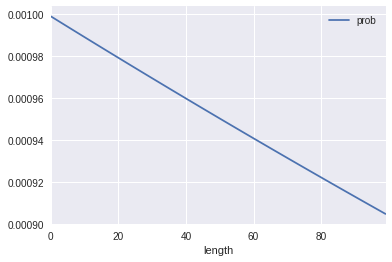

In [290]:
list_n = range(0, 100)
list_prob = list(map(lambda x: a_queue.prob(x), list_n))
df = pd.DataFrame({'length': list_n, 'prob': list_prob}).set_index('length')
df.plot()

In [291]:
# df = pd.DataFrame(a_queue.get_sample()).set_index('n')
sample = []
for i in range(0, 1000):
    sample.append(a_queue.get_sample())
    
sample[:5]
    


[(2698, 2697, 0.9321032029640132, 0.9320690948783276),
 (246, 245, 0.21787275671880846, 0.21755653659903604),
 (1312, 1311, 0.7301774888328404, 0.730070294834064),
 (1313, 1312, 0.730446542706426, 0.7302635977658222),
 (430, 429, 0.34917659384519417, 0.34858675633407266)]

In [292]:
k = lambda x: x[0] > 499
sample_large_iter = filter(k, sample)
large_list = list(sample_large_iter)

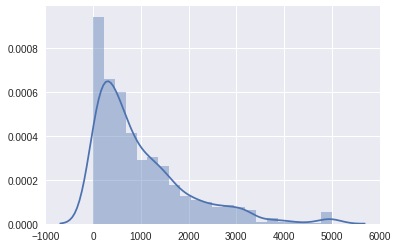

In [293]:
f = lambda e: e[1]
iter_size = list(map(f, sample))

import pandas as pd

iter_size_series = pd.Series(iter_size)
iter_size_series

sns.distplot(iter_size_series)

In [294]:
large_list

[(2698, 2697, 0.9321032029640132, 0.9320690948783276),
 (1312, 1311, 0.7301774888328404, 0.730070294834064),
 (1313, 1312, 0.730446542706426, 0.7302635977658222),
 (1904, 1903, 0.8504615773155718, 0.850330894028849),
 (635, 634, 0.46966159001561836, 0.4694297065954776),
 (643, 642, 0.4738812898343141, 0.473638960005221),
 (900, 899, 0.5929510879072886, 0.5927798829528902),
 (3030, 3029, 0.9511357476122437, 0.9510883580803754),
 (1418, 1417, 0.7572519067650724, 0.7570327935410199),
 (2804, 2803, 0.9388784906765185, 0.9388766450893523),
 (3235, 3234, 0.9600962327114076, 0.9600804389505351),
 (587, 586, 0.44362240005615106, 0.4434489853830042),
 (1259, 1258, 0.715525857880986, 0.7153327530781036),
 (2098, 2097, 0.8767314984509076, 0.8767246563724443),
 (1100, 1099, 0.6666127135680069, 0.6663052318265745),
 (518, 517, 0.40393311556542566, 0.4036935302582934),
 (2727, 2726, 0.9340287049055029, 0.9339897137883848),
 (3229, 3228, 0.9598592157584954, 0.9598290584593409),
 (1976, 1975, 0.860810

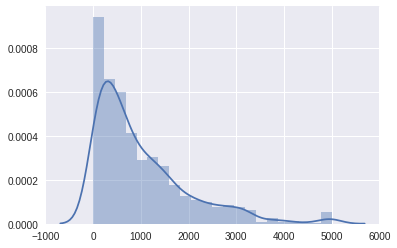

In [295]:

sample_out = list(map(lambda y: y[0], sample))
sns.distplot(sample_out)



In [296]:
a_queue.prob(100)

0.0009039786522454126

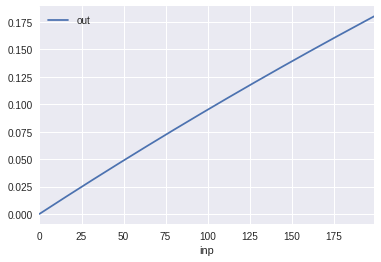

In [297]:
inp = range(0, 200)
outp = list(map(lambda x: a_queue.cdf(x), inp))

df = pd.DataFrame({'inp': inp, 'out': outp}).set_index('inp')
df.plot()

In [298]:
print(a_queue.cdf(100000000000),a_queue.limit())

0.9995004162920151 0.9995004162920151


In [299]:
from sympy import *

r = Symbol('r')
n = Symbol('n')

integrate((1-r)*r**n, (n, 0, n), conds='none')

r**n*(-r + 1)/log(r) - (-r + 1)/log(r)